In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [62]:
names1880 = pd.read_csv(r"C:\Users\matte\OneDrive\Desktop\GitHub\data\py_4_dataana\birth\yob1880.txt",
                         names=["name", "sex", "births"])

names1881 = pd.read_csv(r"C:\Users\matte\OneDrive\Desktop\GitHub\data\py_4_dataana\birth\yob1881.txt",
                         names=["name", "sex", "births"])

In [70]:
path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\py_4_dataana\birth\yob'
all_df = []

for n in np.arange(1880, 2021):
    path = fr'C:\Users\matte\OneDrive\Desktop\GitHub\data\py_4_dataana\birth\yob{n}.txt'
    df = pd.read_csv(path, names=["name", "sex", "births"])
    df['year'] = n
    all_df.append(df)

In [72]:
df = pd.concat(all_df, axis=0, ignore_index=True)
df.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [75]:
total_birth = df.pivot_table('births', columns='sex', index='year', aggfunc='sum')
total_birth.tail()

sex,F,M
year,,
2016,1770086,1895774
2017,1724262,1848496
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588


<Axes: xlabel='year'>

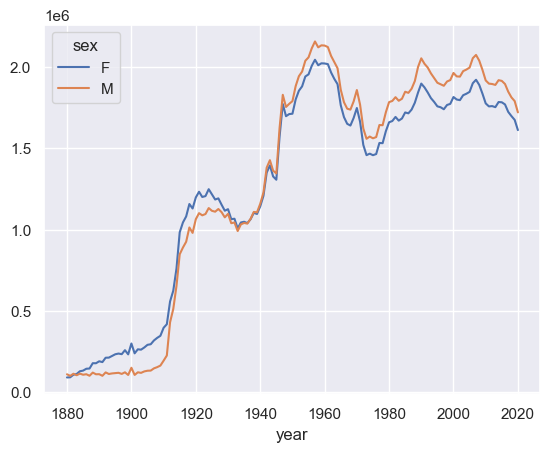

In [76]:
total_birth.plot()

In [93]:
def add_prop(group):
    group["perc"] = group["births"] / group["births"].sum()
    return group

df = df.groupby(["year", "sex"], group_keys=False).apply(add_prop)
df.head()

,name,sex,births,year,erc,perc
0,Mary,F,7065,1880,0.077642,0.077642
1,Anna,F,2604,1880,0.028617,0.028617
2,Emma,F,2003,1880,0.022012,0.022012
3,Elizabeth,F,1939,1880,0.021309,0.021309
4,Minnie,F,1746,1880,0.019188,0.019188


In [101]:
def get_top1000(group):
    return group.sort_values('births', ascending=False).head(1000)

top_df = df.groupby(['year','sex']).apply(get_top1000)
top_df

name sex  births  year       erc      perc
year sex                                                         
1880 F   0             Mary   F    7065  1880  0.077642  0.077642
         1             Anna   F    2604  1880  0.028617  0.028617
         2             Emma   F    2003  1880  0.022012  0.022012
         3        Elizabeth   F    1939  1880  0.021309  0.021309
         4           Minnie   F    1746  1880  0.019188  0.019188
...                     ...  ..     ...   ...       ...       ...
2020 M   2008521     Keenan   M     214  2020  0.000124  0.000124
         2008523    Rogelio   M     213  2020  0.000124  0.000124
         2008522    Jericho   M     213  2020  0.000124  0.000124
         2008525     Kylian   M     212  2020  0.000123  0.000123
         2008524      Karim   M     212  2020  0.000123  0.000123

[281876 rows x 6 columns]

In [102]:
top_df = top_df.reset_index(drop=True
                            )

In [103]:
boys = top_df[top_df['sex']=='M']
girls = top_df[top_df['sex']=='F']

<Axes: xlabel='year'>

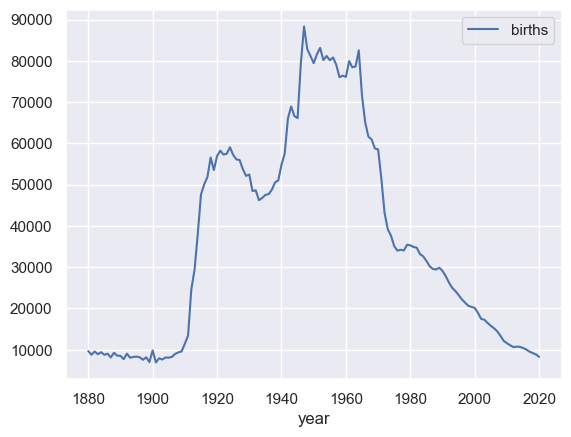

In [106]:
boys[boys['name']=='John'].plot(x='year', y='births')

<Axes: xlabel='year'>

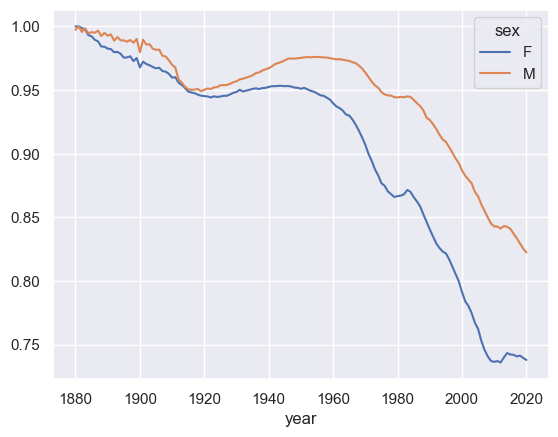

In [109]:
table = top_df.pivot_table('perc', columns='sex', index='year', aggfunc='sum')
table.plot()

In [117]:
def last_l(group):
    group['last'] = group['name'].str[-1]
    return group

df = df.groupby('year').apply(last_l)
df.head()

name sex  births  year       erc      perc last
year                                                        
1880 0       Mary   F    7065  1880  0.077642  0.077642    y
     1       Anna   F    2604  1880  0.028617  0.028617    a
     2       Emma   F    2003  1880  0.022012  0.022012    a
     3  Elizabeth   F    1939  1880  0.021309  0.021309    h
     4     Minnie   F    1746  1880  0.019188  0.019188    e

In [133]:
df = df.droplevel(axis=0, level=1)

In [137]:
df = df.reset_index(drop=True)

In [140]:
lastl_table = df.pivot_table('perc', index='last', columns=['sex','year'], aggfunc='sum')
lastl_table.head()

sex          F                                                              \
year      1880      1881      1882      1883      1884      1885      1886   
last                                                                         
a     0.345583  0.343447  0.338776  0.341248  0.338555  0.341272  0.339715   
b          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
c          NaN       NaN  0.000046  0.000045       NaN       NaN       NaN   
d     0.006693  0.006601  0.006806  0.007212  0.007100  0.006479  0.006967   
e     0.366848  0.370624  0.374595  0.373166  0.372728  0.372898  0.372808   

sex                                 ...         M                      \
year      1887      1888      1889  ...      2011      2012      2013   
last                                ...                                 
a     0.335261  0.332770  0.328712  ...  0.014481  0.014366  0.014537   
b          NaN       NaN       NaN  ...  0.019340  0.018331  0.017609   
c          NaN       NaN       NaN  ...  0.012193  0.012818  0.012749   
d     0.007035  0.007267  0.007703  ...  0.022814  0.022433  0.022607   
e     0.372327  0.373683  0.373737  ...  0.067912  0.067854  0.070032   

sex                                                                         
year      2014      2015      2016      2017      2018      2019      2020  
last                                                                        
a     0.014760  0.015179  0.015709  0.016415  0.017087  0.018179  0.019675  
b     0.016374  0.015479  0.014259  0.013310  0.012544  0.011581  0.010517  
c     0.012429  0.012096  0.011654  0.011145  0.010757  0.010399  0.009695  
d     0.022975  0.022889  0.022718  0.022809  0.023095  0.022800  0.022618  
e     0.068903  0.067234  0.066593  0.066095  0.066318  0.066381  0.067749  

[5 rows x 282 columns]

In [142]:
table2 = lastl_table.reindex(columns=[1910, 1960, 2010], level='year')

<Axes: xlabel='last'>

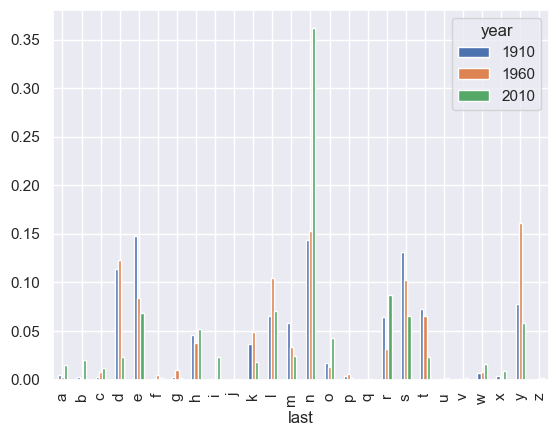

In [146]:
table2['M'].plot.bar()